# **Assignment 2:** Regression and classification

### **Worked hours:** [insert here]
### **Authors:** Sidner Magnéli, Lukas Martinsson 

In [79]:
# clear variable cache at each run
%reset -f 

# global imports and configuration
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix

# set plot style
sns.set_style("darkgrid")

# float output format
pd.options.display.float_format = '{:.2f}'.format

# global output line limit
n = 5


## **Subtask 1:** Hemnet dataset
The dataset associated to this assigment was downloaded from www.hemnet.se on 2020-10-18. The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months
___

In [80]:
# load data
df_raw = pd.read_csv('./datasets/data_assignment2.csv'); df_raw.head(n)
df_raw.head(n)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.00,271.00,25.00,33,4600000
1,2,99,5.00,1506.00,6.00,88,4450000
2,3,133,6.00,486.00,NaN,44,4900000
3,4,175,7.00,728.00,NaN,14,6625000
4,5,118,6.00,1506.00,NaN,29,4600000


In [81]:
# Data cleaning

# use included index
df = df_raw.set_index('ID')

# remove any complete NaN rows
df.dropna(how='all', inplace=True)

# remove irrelevant columns
del df['Rooms'], df['Land_size'], df['Biarea'], df['Age']

df.head(n)

,Living_area,Selling_price
ID,,
1,104,4600000
2,99,4450000
3,133,4900000
4,175,6625000
5,118,4600000


### **1.a)** Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.

Coefficient of determination: 0.1350684561461819


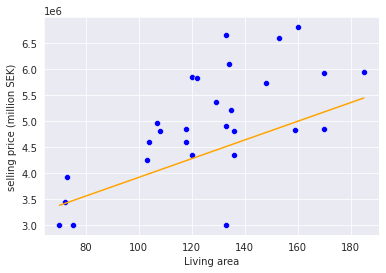

In [82]:
# transform input data
X = df.loc[:, ['Living_area']].values
y = df['Selling_price'].values

# split into train / test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit model
linear_regr_model = LinearRegression().fit(X_train, y_train)

# make predictions Y = b0 + b1X + Err
y_pred = linear_regr_model.predict(X_test)

print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

# Plot outputs
ax = sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', )
sns.lineplot(x=X_test.flatten(), y=y_pred, color='orange')
ax.set(xlabel='Living area', ylabel='selling price (million SEK)');

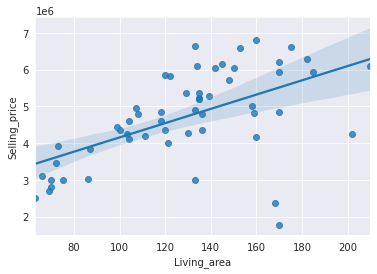

In [83]:
# alternativr solution
sns.regplot(x="Living_area", y="Selling_price", data=df);

### **1.b)** What are the values of the slope and intercept of the regression line?

In [84]:
# Slope
print(f'Slope: {linear_regr_model.coef_}')

# Intercept
print(f'Intercept: {linear_regr_model.intercept_}')

Slope: [17948.69295909]
Intercept: 2119746.8758798437


### **1.c)** Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2and 200 m2.

In [85]:
predicted_house_prices = pd.DataFrame()
for i in np.array([100, 150, 200]):
  predicted_house_prices = predicted_house_prices.append({'Living_area': i, 'Predicted selling_price (SEK)': linear_regr_model.predict([[i]])[0]}, ignore_index=True)

predicted_house_prices

,Living_area,Predicted selling_price (SEK)
0,100.00,3914616.17
1,150.00,4812050.82
2,200.00,5709485.47


### **1.d)** Draw a residual plot.

<AxesSubplot:>

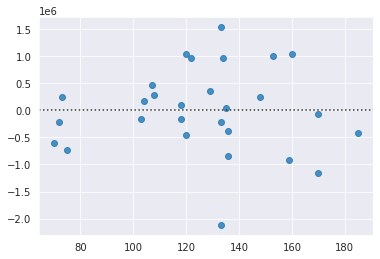

In [86]:
# the residuals make up the difference between the predicted and observed output values
residuals = y_test - y_pred

# we plot the residuals against the test inputs as this aligns with the plot above.
sns.residplot(x=X_test, y=residuals)

### **1.e)** Discuss the results, and how the model could be improved.

As the graphs in section **1.a)** indicate, there's an obvious correlation, in this dataset, between a houses ***living area*** and it's ***selling price***. Whether it's the living area that affects house prices or the fact that more expensive houses tend to have larger living areas is hard to tell from only looking at these two parameters. For instance, it would also be interesting to include the ***price per square meter*** and ***location***, as these parameters might help highlight furter patterns.

#### Potential model improvements
Looking the residual plot from **1.d)** one notices the true observations are quite evenly distrubuted around the line of prediction. Yet, there are a few outliers that might either be the effect of some other parameters at play, or could just be the result of errors in the raw data. One improvment to this model could then be to discard these outliers to remove the effect of potential errors in the data. Howver, in the case that the outliers are reflecting real observations where other factors than ***living area*** are at play, removing these outliers does the opposite of improving the model. Hence, in short: *Sometimes outliers are bad data, and should be excluded, such as typos. Sometimes they are Wayne Gretzky or Michael Jordan, and should be kept.*

A soultion to this dilemma is to increase a models robustness by using a regression algorithm that accounts for outliers and assings them less weight than other observations in the dataset. One such algorithm is Huber regression.

## **Subtask 2:** Iris dataset
In this question, you will use the Iris dataset `from sklearn.datasets import load_iris`.
___

### **2.a)** Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

**Step 1:** generate predictions using a logistic reagression model.

For binary mutliclass datasets, the model defaults to using a **One vs Rest** schema, where a separate model is trained for each class predicting whether an observation is that class or not (thus making it a binary classification problem).

In [87]:
# load and split data into train / test sets
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Generate and train logistic regression model
logistic_regr_model = LogisticRegression(n_jobs=-1).fit(X_train, y_train)

# Predict class
y_pred = logistic_regr_model.predict(X_test)

# output mean accuracy 
print(f'Mean accuracy: {logistic_regr_model.score(X_test, y_test)}')

Mean accuracy: 0.9666666666666667


**Step 2:** Generate and plot the logistical regression models confusion matrix 

In [90]:
confusion_matrix = confusion_matrix(y_test, y_pred) # generate confusion matrix for observations vs predictions
sns.heatmap(data=confusion_matrix, annot=True, cbar=True, fmt='.3f', square=True, cmap = 'Blues_r')

TypeError: 'numpy.ndarray' object is not callable